# Importing libraries

Pandas = This library help the loads the data frame in 2d array format and has multiple
        function performs analysis task in one go
Numpy = Numpy array is very fast and can perform large contribution is a very short time
Matplotlib/Seaborn = This library is use for draw visualizations.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing Datasets

In [56]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [57]:
# shape
dataset.shape

(1156, 7)

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing
as we not in our colomn there are null values are there so we can use NOT keyword to replace

In [59]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

In [60]:
# coerce = mean's is conversion of data types from one to another

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                      errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                    errors = 'coerce')

In [61]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


In [62]:
dataset.dropna(inplace=True)



In [63]:
dataset.drop_duplicates(inplace=True)

# DATA VISUALIZATION

In [64]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
    unique_values

In [65]:
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

# Now we use matplotlib and seaborn library to visualization

C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

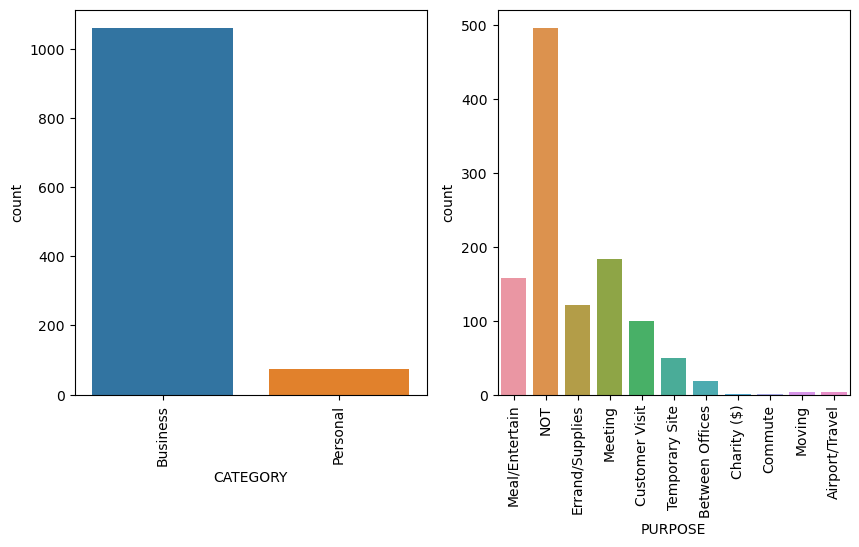

In [66]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sn.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sn.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)


# lets do same thing with time column here we will using the time column which we have extracted above

C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

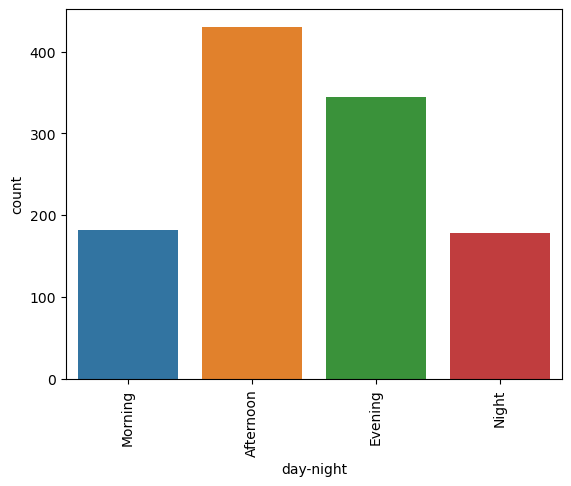

In [67]:
sn.countplot(dataset['day-night'])
plt.xticks(rotation=90)

# now we will compare the two categories with purpose of user

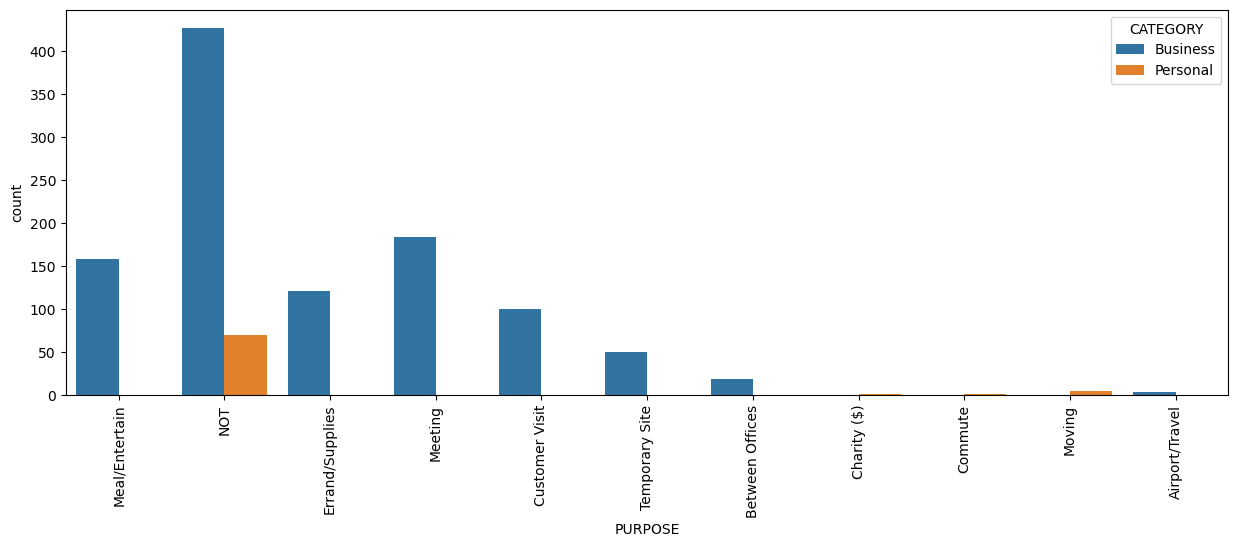

In [68]:
plt.figure(figsize=(15,5))
sn.countplot(data=dataset, x = "PURPOSE", hue = 'CATEGORY')
plt.xticks(rotation=90)
plt.show()

Insights from the above count-plots
1. Most of the rider are booked for bussiness purpose
2. Most of the people are booked for meeting or meal/ entertain purpose
3. Most of the cabs are booked for in the time duration of 10am - 5pm (Afternoon)

# Now we know the two category are very important now we will useing OneHotEncoder in purpose and category

One Hot Encoding = the representation of categorical variable as binary vectors.
                    these categorical values are first mapped to integer values each integer values is then represented
                    as in binary vector that is all 0s (except the index of the integer which is markek of 1)

In [69]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.column = OH_encoder.get_feature_names()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis = 1)

C:\Users\GovindaRadha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\GovindaRadha\AppData\Local\Temp\ipykernel_4008\2215975172.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  OH_cols.column = OH_encoder.get_feature_names()


# now we find the correlation between the colomns using heatmap

<AxesSubplot:>

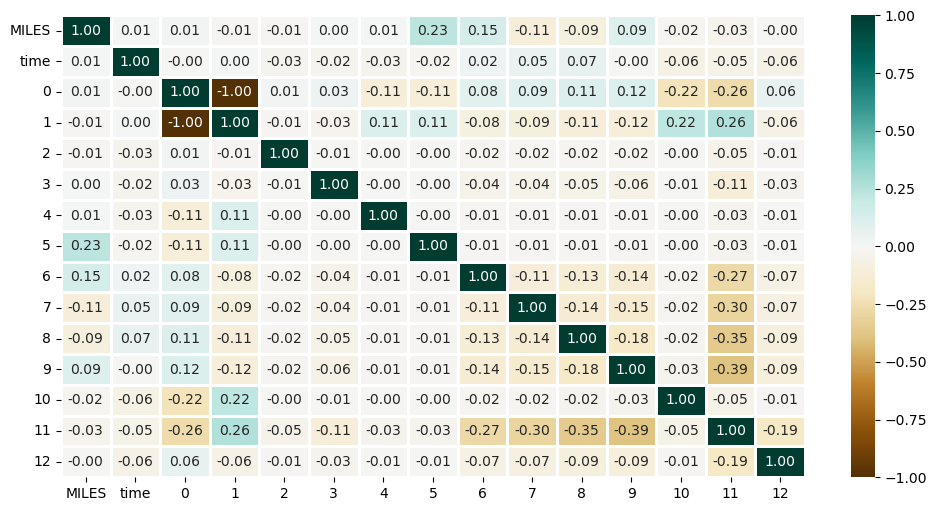

In [71]:
plt.figure(figsize=(12,6))
sn.heatmap(dataset.corr(),
          cmap='BrBG',
          fmt='.2f',
          linewidths=2,
          annot=True)

# insight from the heapmap
1. Business and Personal category are highly correlated, 
2. there is not much correlation between both

===============================================================================================================================
Now we need to visualize the month data as same as (hours) data

[Text(0.5, 0, 'MONTH'), Text(0, 0.5, 'VALUE_COUNT')]

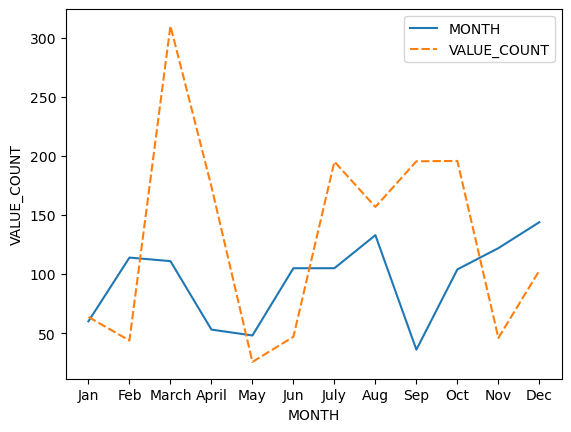

In [74]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'March', 4.0: 'April', 5.0: 'May', 6.0: 'Jun',
              7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset['MONTH'] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

## month total rides count vs Month ride max count

df = pd.DataFrame({'MONTH' : mon.values,
                  'VALUE_COUNT': dataset.groupby('MONTH',
                                                sort=False)['MILES'].max()})

p = sn.lineplot(data=df)
p.set(xlabel='MONTH', ylabel='VALUE_COUNT')

# insight are above

1. the count are very irregular
2. stills is very clear that the counts are very less during nov, dec, jan which
    still justifies the face that time winters are there in florida us

In [76]:
# visualization for days

In [77]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0:'MON', 1:'TUE', 2:'WED', 3:'THUR', 4:'FRI', 5:'SAT', 6:'SUN'
}

dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

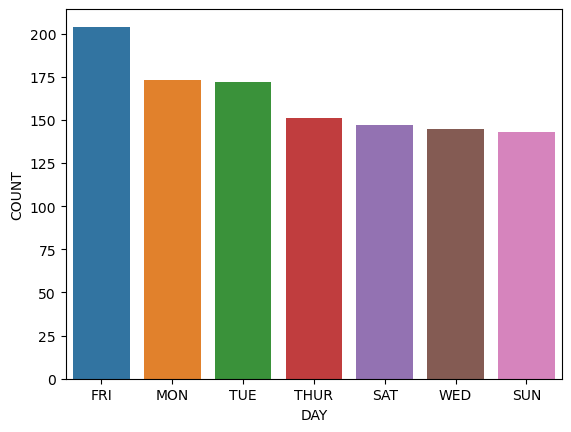

In [78]:
day_label = dataset.DAY.value_counts()
sn.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

# Now, let’s explore the MILES Column .

We can use boxplot to check the distribution of the column.

C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES'>

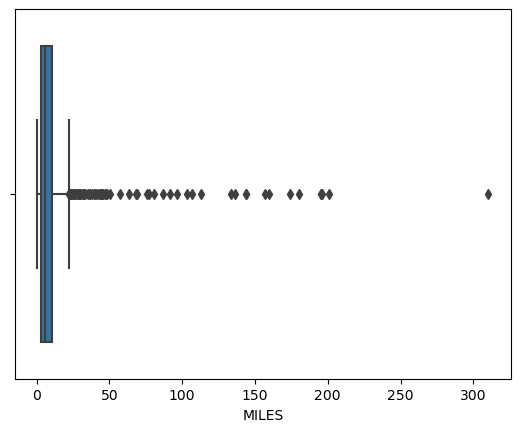

In [80]:
sn.boxplot(dataset['MILES'])

# As the graph is not clearly understandable. Let’s zoom in it for values lees than 100

C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES'>

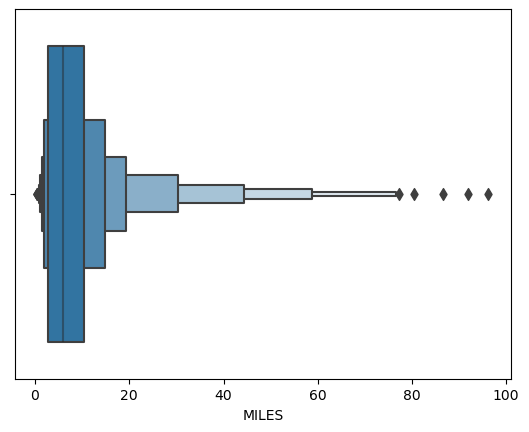

In [82]:
sn.boxenplot(dataset[dataset['MILES']<100]['MILES'])

In [83]:
# It’s bit visible. But to get more clarity we can use distplot for values less than 40.

C:\Users\GovindaRadha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MILES', ylabel='Density'>

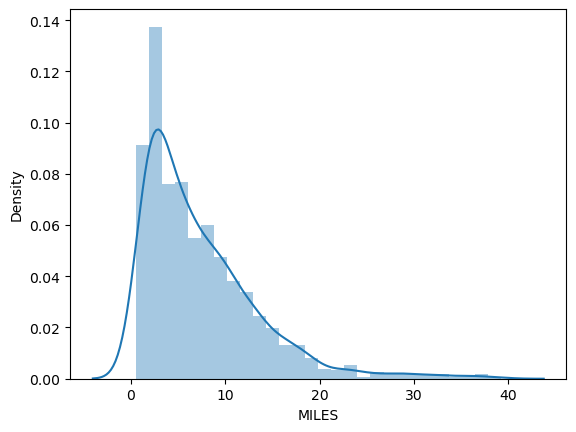

In [85]:
sn.distplot(dataset[dataset['MILES']<40]['MILES'])

# Insight from above 
1. most of the cabs are booked for 4-5 km
2. majorly people use cabs for 0-20 km
3. for distance more than 20 miles cab count is negligible